# Prepare additional dataset for inverse problem-solving
- Four types of "inverse problem" graphs will be made

In [1]:
import sys
sys.path.append("../MIGraph/GraphConv/")

from ValueTransformer import ValueTransformer
from ConvGraphScript import drawGraph,checkGraphList
from AutoParameterScaling import AutoParameterScaling
from ConvGraphmlToGraph import loadGraphCSV
from PrepGraphScript import PrepGraphScript

import glob
import os
import joblib


In [2]:
os.chdir("praparingGraphs")
AutoSC=joblib.load("output/AutoSC.scaler")


In [3]:
folderList=glob.glob("screen_input/*")
print(folderList)

['screen_input/sc1']


In [4]:
#get folder list
CSVPathList=[]
graphPathList=[]

for folder in folderList:
    CSVPath=folder+"/"+os.path.basename(folder)+".csv"
    graphPath=folder+"/graph/"
    CSVPathList.append(CSVPath)
    graphPathList.append(graphPath)
    
#prepare graphgs
VT=ValueTransformer()
for CSVPath,graphPath in zip(CSVPathList,graphPathList):
    print(CSVPath)
    gList=loadGraphCSV(CSVPath,graphPath)
    gList=VT.convertGraphList(gList)
    checkGraphList(gList)
    
    #save
    filename=os.path.basename(CSVPath)
    outname="screen_output/"+filename.replace(".csv","")+".graphbin"
    print("saving...", outname)
    joblib.dump(gList,outname,compress=3)
    


100%|██████████| 4/4 [00:00<00:00, 481.40it/s]

screen_input/sc1/sc1.csv
warning! very large value: 10000.0 graph number: 3 node:  n22
checking graph values...
caution: too large val:  10000.0 graph No.:  3
check done
saving... screen_output/sc1.graphbin


In [5]:
#scaling
folderList=glob.glob("screen_output/*.graphbin")

#for i in folderList:
#    AutoSC.autoTransform([i])    
AutoSC.autoTransform(folderList)   

100%|██████████| 1/1 [00:00<00:00, 38.53it/s]

saving:  screen_output/sc1.graphbin


100%|██████████| 1/1 [00:00<00:00, 230.58it/s]

screen_output/sc1.graphbin
4  plots


['keep',
 0.18848633432031064,
 0.3851820772310444,
 '[oc]',
 '[minutes]',
 'C_PEDOT_PSS_PH1000',
 'C_Water',
 'mix',
 -0.9598425595389851,
 '[weight percent]',
 1.144056300565697,
 '[weight percent]',
 'spincoat',
 'drop',
 'keep',
 1.138971186585907,
 -0.580658132510507,
 '[oc]',
 '[minutes]',
 'rinse',
 'C_Water',
 'electric conductivity',
 350.5182130215521,
 '[s/cm]',
 'keep',
 1.138971186585907,
 -0.580658132510507,
 '[oc]',
 '[minutes]',
 'mix',
 '_unknown_',
 'C_Water',
 -0.879920323580183,
 '[weight percent]',
 1.0641340646068949,
 '[weight percent]',
 'pedot_pss_ph1000',
 'time',
 'temperature',
 'weight percent',
 'weight percent',
 'weight percent',
 'weight percent',
 'time',
 'temperature',
 'time',
 'temperature',
 'melting temperature',
 -0.5967885204453609,
 '[oc]']

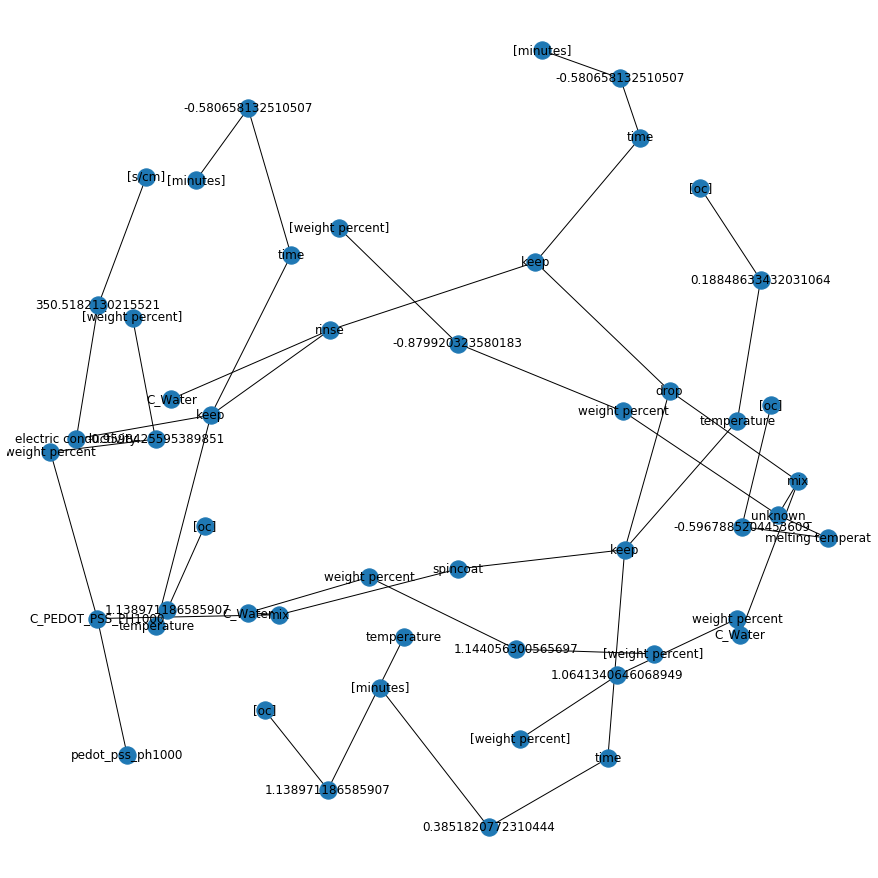

In [6]:
from tqdm import tqdm

#check graph
graphbinList=glob.glob("screen_output/*.graphbin")

gList=[]
for file in tqdm(graphbinList):
    print(file)
    temp=joblib.load(file)
    gList.extend(temp)

print(len(gList), " plots")

drawGraph(gList[-2])
g=gList[-2]
nodeVals=[g.nodes[node]["label"] for node in g.nodes]
nodeVals



# the above graph is complicating...
- but you can view the original graphml file by some viewer (yEd, etc) for easiness
- the graph is a problem asking a best additive to give a final conductivity of 10 S/cm
- as the additional condition, the compound should have a melting point of -15oC
- there are 4 problems in total (asking compounds, which may give a conductivity of 10, 100, 1000, and 10000 S/cm, respectivety)